Arewa Data Science Academy Deep Learning Cohort2.0 Name: Faisal Muhammad Adam Email: faisaladamm@gmail.com Title: Week 3 Solution

Question1. What are 3 areas in industry where computer vision is currently being used?

Due to advancement of technology in todays world, Application of computer is almost in every sector of our day to day activities.
 Below are the three key areas where computer vision is currently being applied:-


1.   **Manufacturing & Quality Control** Computer vision is used for detecting assembly line, monitoring and ensuring product consistency through automated visual inspection systems.
2.   **Autonomous Vehicles Industry** Th invention of a self-driving is the current trend in developed countries.
The cars rely on computer vision to navigate the world just like humans do. The system acts like an ultra-alert driver that instantly spots everything on the road using a perfect 360° awareness that never gets distracted. It reads traffic signals as easily as human do, while special 3D mapping constantly judges distances to nearby objects with laser precision.
This Innovation result to significant drop in accident crashes, less stressful driving, and new freedom for people who can't operate a vehicle themselves.
It's about creating a co-pilot that's always watching, never tires, and helps prevent accidents before they happen.


3.   **Healthcare & Medical Imaging**
Computer vision is transforming healthcare by giving doctors a powerful new set of eyes. In medical imaging, AI can spot early signs of diseases like cancer or fractures in X-rays and MRIs sometimes catching things human eyes might miss.
It's helping radiologists work faster by flagging urgent cases and automatically measuring organs in scans. During surgeries, augmented reality overlays critical information like blood vessels or tumors directly onto the surgeon's view, while robotic systems use real-time vision for ultra-precise movements.
Beyond hospitals, computer vision enables remote monitoring tracking wound healing through smartphone photos or analyzing movement patterns to detect neurological disorders. The technology isn't replacing doctors, but giving them superhuman abilities to diagnose earlier, treat more accurately, and save more lives, all while reducing human error and making healthcare more accessible.


Question2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

In machine Learning, Overfitting happens when a model learns the training data too well including its noise and random fluctuations thereby making it perform poorly.
To my understanding, Overfitting is like memorizing answers for a test instead of understanding the concepts.


Question3.Search ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.


*   Cross-Validation:- is a robust technique to mitigate overfitting by evaluating a model's performance on multiple subsets of the training data, ensuring it generalizes well to unseen data.
Instead of testing your model on just one train-test split, use techniques like k-fold, Stratified k-Fold,and Leave-One-Out to check performance across multiple data splits.
*   Regularization (L1/L2):-is a technique used to prevent overfitting by adding a "penalty" to the model's loss function, discouraging overly complex (large) weights in the model.
Regularization is like giving your model a "budget" for complexity to prioritize only the most important patterns in the data.


*   Early Stopping:- This is  process of stoping training when the models performance on validation data starts worsening while you're ahead to avoid memorizing the training data.






 Question4 Spend 20-minutes reading and clicking through the CNN Explainer website.

Question5  Load the torchvision.datasets.MNIST() train and test datasets.

In [1]:
import torch
from torchvision import datasets, transforms

# 1. Define a transform to normalize the data (optional but recommended)
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL Image to PyTorch Tensor
    transforms.Normalize((0.1307,), (0.3081,))  # Mean & std of MNIST
])

# 2. Load the training set
train_dataset = datasets.MNIST(
    root='./data',          # Download to /data folder
    train=True,             # Load training set
    download=True,          # Download if not already present
    transform=transform     # Apply the transform
)

# 3. Load the test set
test_dataset = datasets.MNIST(
    root='./data',
    train=False,            # Load test set
    download=True,
    transform=transform
)

# 4. (Optional) Create DataLoaders for batching/shuffling
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

print(f"Training samples: {len(train_dataset)}")  # Output: 60,000
print(f"Test samples: {len(test_dataset)}")      # Output: 10,000

100%|██████████| 9.91M/9.91M [00:00<00:00, 59.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.78MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.9MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.35MB/s]

Training samples: 60000
Test samples: 10000


Question6. Visualize at least 5 different samples of the MNIST training dataset.

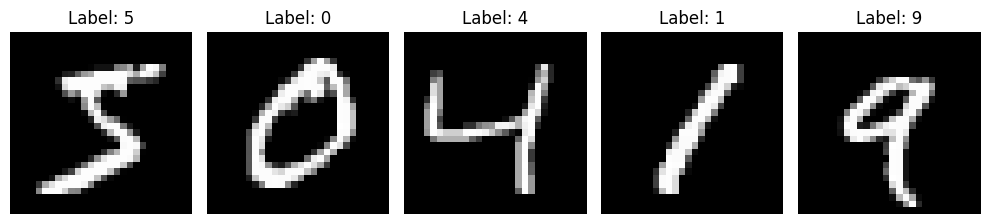

In [2]:
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms

# Load MNIST dataset
transform = transforms.ToTensor()
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Create a figure to display samples
plt.figure(figsize=(10, 5))

# Plot 5 random samples
for i in range(5):
    # Get a random sample
    image, label = train_dataset[i]

    # Create subplot
    plt.subplot(1, 5, i+1)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f"Label: {label}", fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()

Question7 Turn the MNIST train and test datasets into dataloaders using torch.utils.data.DataLoader, set the batch_size=32.

In [4]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transform (convert to tensor and normalize)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # MNIST mean and std
])

# Load datasets
train_dataset = datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

# Create DataLoaders with batch_size=32
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=32,
    shuffle=True,  # Important for training
    num_workers=2  # Parallel data loading
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=32,
    shuffle=False,  # No need to shuffle test data
    num_workers=2
)

# Print summary
print(f'Train batches: {len(train_loader)} ({(len(train_dataset)/32):.1f} batches)')
print(f'Test batches: {len(test_loader)} ({(len(test_dataset)/32):.1f} batches)')

Train batches: 1875 (1875.0 batches)
Test batches: 313 (312.5 batches)


Question 8. Recreate model_2 used in notebook 03 (the same model from the CNN Explainer website, also known as TinyVGG) capable of fitting on the MNIST dataset.

In [5]:
import torch
from torch import nn

class TinyVGG(nn.Module):
    """
    Model architecture from CNN Explainer website (TinyVGG)
    adapted for MNIST (1 input channel, 10 output classes)
    """
    def __init__(self, input_shape=1, hidden_units=10, output_shape=10):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),  # same padding
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,  # Adjusted for MNIST's 28x28
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

# Instantiate the model
model = TinyVGG(input_shape=1,  # MNIST has 1 color channel (grayscale)
                hidden_units=10,  # Matches CNN Explainer default
                output_shape=10)  # 10 classes for MNIST digits

# Print model summary
print(model)

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)


Question 9 Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from timeit import default_timer as timer
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Load MNIST data (from previous exercise)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

# Recreate TinyVGG model (from exercise 8)
class TinyVGG(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(1, 10, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(10, 10, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(10, 10, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(10, 10, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(10*7*7, 10)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

# Training function
def train_model(device, epochs=5):
    model = TinyVGG().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters())

    start_time = timer()

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for batch, (X, y) in enumerate(train_loader):
            X, y = X.to(device), y.to(device)

            optimizer.zero_grad()
            y_pred = model(X)
            loss = criterion(y_pred, y)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        print(f"Epoch {epoch+1}/{epochs} | Loss: {train_loss/len(train_loader):.4f}")

    end_time = timer()
    total_time = end_time - start_time
    print(f"Training complete on {device} in {total_time:.2f} seconds")
    return total_time

# Compare devices
if __name__ == "__main__":
    # CPU training
    print("=== CPU Training ===")
    cpu_time = train_model(device="cpu")

    # GPU training (if available)
    if torch.cuda.is_available():
        print("\n=== GPU Training ===")
        gpu_time = train_model(device="cuda")

        # Speed comparison
        speedup = cpu_time / gpu_time
        print(f"\nGPU was {speedup:.1f}x faster than CPU!")
    else:
        print("\nNo GPU available, skipping GPU test")

=== CPU Training ===
Epoch 1/5 | Loss: 0.2080
Epoch 2/5 | Loss: 0.0695
Epoch 3/5 | Loss: 0.0514
Epoch 4/5 | Loss: 0.0431
Epoch 5/5 | Loss: 0.0363
Training complete on cpu in 288.49 seconds

No GPU available, skipping GPU test


Question10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

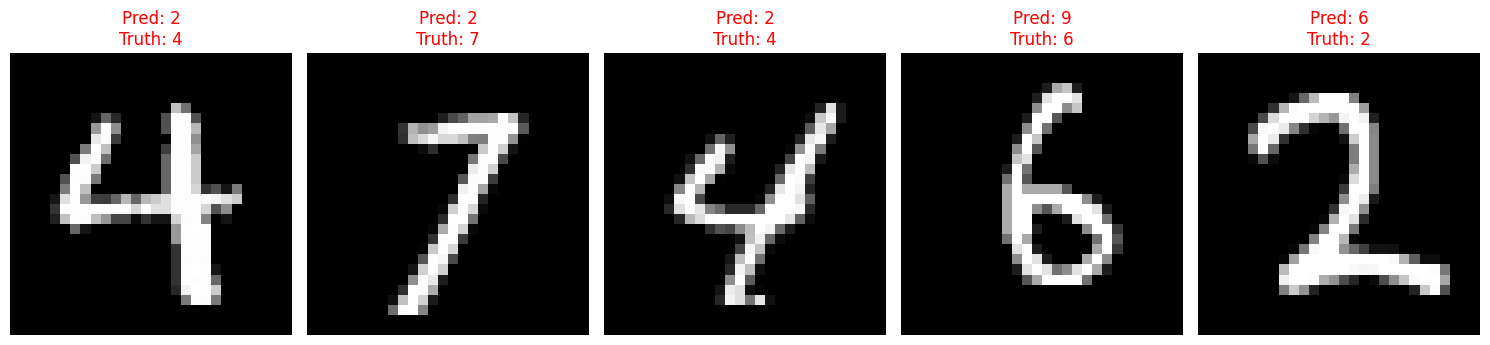

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import torch

def visualize_predictions(model, test_loader, device, num_samples=5):
    # Get a batch of test data
    test_images, test_labels = next(iter(test_loader))
    test_images, test_labels = test_images.to(device), test_labels.to(device)

    # Make predictions
    model.eval()
    with torch.inference_mode():
        test_preds = model(test_images)
        pred_probs = torch.softmax(test_preds, dim=1)
        pred_labels = torch.argmax(pred_probs, dim=1)

    # Move to CPU for plotting
    test_images = test_images.cpu()
    pred_labels = pred_labels.cpu()
    test_labels = test_labels.cpu()

    # Plot results
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(test_images[i].squeeze(), cmap='gray')

        # Get predicted and true labels
        pred = pred_labels[i].item()
        truth = test_labels[i].item()

        # Set title color based on correct prediction
        title_color = 'green' if pred == truth else 'red'
        plt.title(f"Pred: {pred}\nTruth: {truth}", color=title_color)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Load test data
test_data = datasets.MNIST(root='./data', train=False, transform=transform)
test_loader = DataLoader(test_data, batch_size=32, shuffle=True)

# Run visualization (ensure model is trained and on the right device)
visualize_predictions(model, test_loader, device="cuda" if torch.cuda.is_available() else "cpu")

Question11. Plot a confusion matrix comparing your model's predictions to the truth labels.

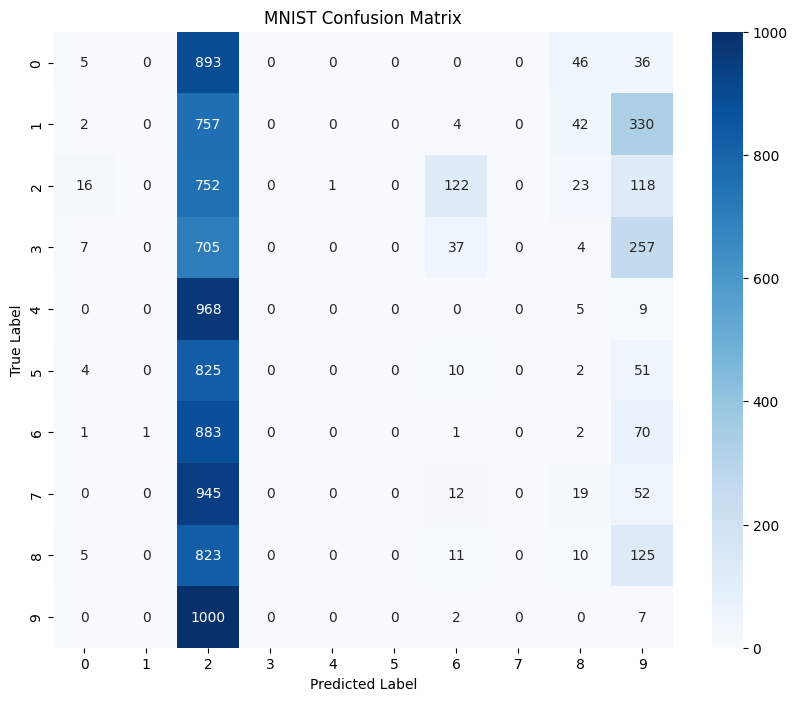

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import torch

def plot_confusion_matrix(model, test_loader, device):
    # Get all predictions and true labels
    model.eval()
    all_preds = []
    all_labels = []

    with torch.inference_mode():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            y_logits = model(X)
            y_pred = torch.argmax(y_logits, dim=1)
            all_preds.extend(y_pred.cpu().numpy())
            all_labels.extend(y.cpu().numpy())

    # Generate confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    # Plot
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=range(10),
                yticklabels=range(10))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('MNIST Confusion Matrix')
    plt.show()

# Usage (after training)
plot_confusion_matrix(model, test_loader, device="cuda" if torch.cuda.is_available() else "cpu")

Question12. Create a random tensor of shape [1, 3, 64, 64] and pass it through a nn.Conv2d() layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the kernel_size parameter goes up and down?

In [10]:
import torch
import torch.nn as nn

# Create random tensor [batch_size, channels, height, width]
random_tensor = torch.randn(1, 3, 64, 64)  # 1 image, 3 channels, 64x64 pixels

# Define convolution layers with different kernel sizes
conv_k3 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
conv_k5 = nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=2)
conv_k7 = nn.Conv2d(3, 16, kernel_size=7, stride=1, padding=3)
conv_k1 = nn.Conv2d(3, 16, kernel_size=1, stride=1, padding=0)

# Pass tensor through each layer
output_k3 = conv_k3(random_tensor)
output_k5 = conv_k5(random_tensor)
output_k7 = conv_k7(random_tensor)
output_k1 = conv_k1(random_tensor)

# Print shapes
print(f"Original shape: {random_tensor.shape}")
print(f"k3 output shape: {output_k3.shape}")
print(f"k5 output shape: {output_k5.shape}")
print(f"k7 output shape: {output_k7.shape}")
print(f"k1 output shape: {output_k1.shape}")

Original shape: torch.Size([1, 3, 64, 64])
k3 output shape: torch.Size([1, 16, 64, 64])
k5 output shape: torch.Size([1, 16, 64, 64])
k7 output shape: torch.Size([1, 16, 64, 64])
k1 output shape: torch.Size([1, 16, 64, 64])


In [11]:
# Calculate multiply-add operations (approximate)
def flops(h, w, in_c, out_c, k):
    return h * w * in_c * out_c * k * k

print(f"k3 FLOPs: {flops(64, 64, 3, 16, 3):,}")  # ~1.7M
print(f"k5 FLOPs: {flops(64, 64, 3, 16, 5):,}")  # ~4.9M (3x k3)
print(f"k7 FLOPs: {flops(64, 64, 3, 16, 7):,}")  # ~9.6M (5.6x k3)

k3 FLOPs: 1,769,472
k5 FLOPs: 4,915,200
k7 FLOPs: 9,633,792


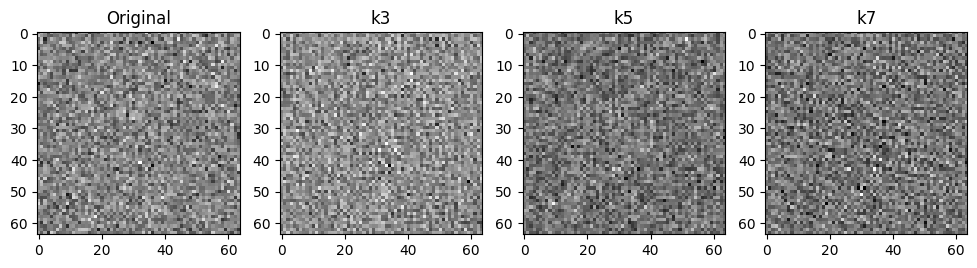

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(141); plt.title("Original"); plt.imshow(random_tensor[0, 0].detach(), cmap='gray')
plt.subplot(142); plt.title("k3"); plt.imshow(output_k3[0, 0].detach(), cmap='gray')
plt.subplot(143); plt.title("k5"); plt.imshow(output_k5[0, 0].detach(), cmap='gray')
plt.subplot(144); plt.title("k7"); plt.imshow(output_k7[0, 0].detach(), cmap='gray')
plt.show()

Question13. Use a model similar to the trained model_2 from notebook 03 to make predictions on the test torchvision.datasets.FashionMNIST dataset.
Then plot some predictions where the model was wrong alongside what the label of the image should've been.
After visualing these predictions do you think it's more of a modelling error or a data error?
As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [16]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms

# Load FashionMNIST
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.2860,), (0.3530,))  # FashionMNIST stats
])

# Modified TinyVGG for FashionMNIST
class FashionVGG(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(1, 10, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(10, 10, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(10, 10, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(10, 10, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(10*7*7, 10)
        )  # This parenthesis was missing

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

# Test the model
if __name__ == "__main__":
    model = FashionVGG()
    test_data = datasets.FashionMNIST(
        root="./data",
        train=False,
        download=True,
        transform=transform
    )
    print("Model and data loaded successfully!")

100%|██████████| 26.4M/26.4M [00:01<00:00, 18.9MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 303kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.47MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 7.76MB/s]

Model and data loaded successfully!


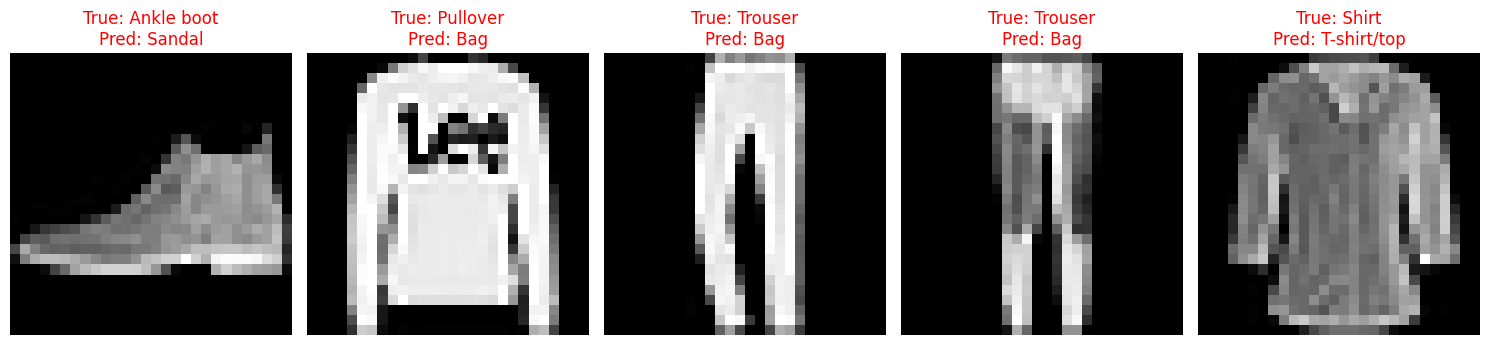

In [18]:
def plot_mistakes(model, test_data, n_samples=5):
    # Define class names inside the function
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

    mistakes = []
    with torch.no_grad():
        for img, label in test_data:
            pred = model(img.unsqueeze(0)).argmax().item()
            if pred != label:
                mistakes.append((img, label, pred))
            if len(mistakes) >= n_samples:
                break

    plt.figure(figsize=(15, 5))
    for i, (img, true, pred) in enumerate(mistakes):
        plt.subplot(1, n_samples, i+1)
        plt.imshow(img.squeeze(), cmap='gray')
        plt.title(f"True: {class_names[true]}\nPred: {class_names[pred]}", color='red')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Now this will work:
plot_mistakes(model, test_data)